In [20]:
import pandas as pd #type:ignore
import matplotlib.pyplot as plt #type:ignore
import seaborn as sns #type:ignore

In [21]:
df = pd.read_csv("uber.csv")
df.head()
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [22]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [23]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [26]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']);
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


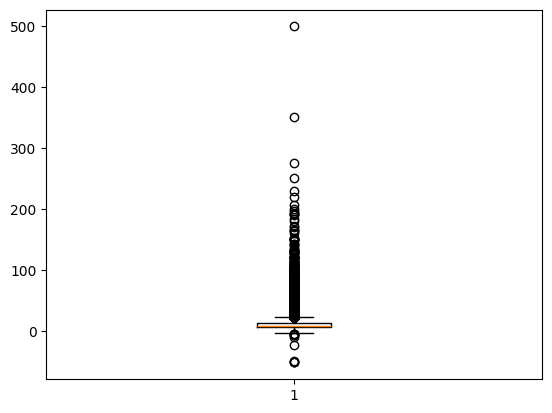

In [27]:
plt.boxplot(df['fare_amount'])
plt.show()

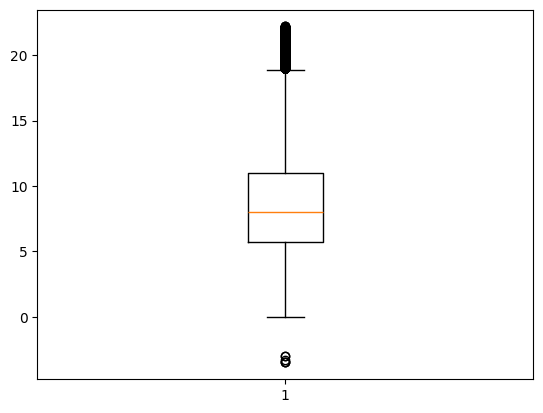

In [28]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)

iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+ 1.5*iqr

df = df[(df['fare_amount']<ub) & (df['fare_amount']>lb)]

plt.boxplot(df['fare_amount'])
plt.show()

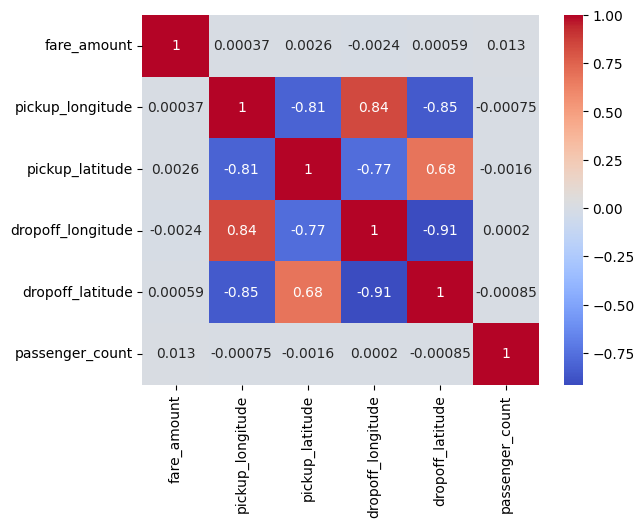

In [29]:
plt.figure("Correlation")
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm",annot=True)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression #type:ignore
from sklearn.model_selection import train_test_split #type:ignore
x = df.drop("fare_amount",axis=1)
y = df["fare_amount"]
x["pickup_datetime"] = pd.to_numeric(x["pickup_datetime"])
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182833 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    182833 non-null  int64  
 1   pickup_longitude   182833 non-null  float64
 2   pickup_latitude    182833 non-null  float64
 3   dropoff_longitude  182833 non-null  float64
 4   dropoff_latitude   182833 non-null  float64
 5   passenger_count    182833 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 9.8 MB


In [31]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.8,random_state=42)

In [32]:
lr = LinearRegression()
lr.fit(xTrain,yTrain)

LinearRegression()

In [33]:
yPred = lr.predict(xTest)

In [34]:
from sklearn.metrics import root_mean_squared_error,r2_score #type:ignore
rmse = root_mean_squared_error(yTest,yPred)
print(rmse)
r2 = r2_score(yTest,yPred)
print(r2)

4.104508521820204
0.01972009055370416


In [35]:
from sklearn.ensemble import RandomForestRegressor # type: ignore
rfr = RandomForestRegressor(n_estimators=101,random_state=100)

rfr.fit(xTrain,yTrain)

pred = rfr.predict(xTest)
print(root_mean_squared_error(yTest,pred))
print(r2_score(yTest,pred))

2.219524947004014
0.713352710069437
